# Dye2, Greenland 

**Station Name:** gls1

**Location:**  Dye2, Qeqqata Province, Greenland 

**Archive:**  [UNAVCO](http://www.unavco.org), [SOPAC](http://sopac-csrc.ucsd.edu/index.php/sopac/)

**DOI:**  [https://doi.org/10.7283/T5WS8RDB](https://doi.org/10.7283/T5WS8RDB)

**Ellipsoidal Coordinates:**

- Latitude: 66.47940

- Longitude:  -46.31015

- Height: 2150 m

[Station Page at UNAVCO](https://www.unavco.org/instrumentation/networks/status/nota/overview/gls1)

[Station Page at Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/stations/GLS1.sta)

[Google Maps Link](https://goo.gl/maps/391a7h2HpacAa59u8) 

<img src="../../../docs/_static/gls1.jpg" width="400">
<BR>


In [1]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.daily_avg_cl import daily_avg


# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
# If in docker environment, then you do not need to download crxnrnx
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

environment variable ORBITS set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits 
environment variable REFL_CODE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks 
environment variable EXE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks
Your executable environment area:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
There is no teqc executable for this architecture, so none will be installed.
This Hatanaka executable already exists
The gfzrnx executable already exists


**Fast Mode:** 
this will download data weekly instead of daily

fast mode for this notebook: ~5 minutes

In [3]:
weekly = widgets.Checkbox(value=True, description='Fast Mode', disabled=False, indent=False)
weekly

Checkbox(value=True, description='Fast Mode', indent=False)

Deselect the Fast Mode checkbox to deactivate fast mode.

## Data Summary

Station gls1 was installed at [Dye2](http://greenlandtoday.com/dye-2-a-relic-from-a-not-so-distant-past/?lang=en) on the Greenland Ice Sheet in 2011. 
The antenna is mounted on a long pole; approximately 3.5-meter of the pole was above the ice at the time of installation. 
The receiver at the site only consistently tracks legacy GPS signals. A detailed discussion of the monument and 
data from the station can be found in [Larson, MacFerrin, and Nylen (2020)](https://tc.copernicus.org/articles/14/1985/2020/tc-14-1985-2020.pdf). 
The latest position time series for gls1 can be retrieved 
from the [Nevada Geodetic Laboratory](http://geodesy.unr.edu/gps_timeseries/tenv3/IGS14/GLS1.tenv3). 
We also have a utility you can use: **download_unr**

As gls1 is on an ice sheet and the ice surface is relatively smooth in all directions, it 
is unlikely that a complicated azimuth mask will be required.
gls1 was originally installed with an elevation mask of 7 degrees, which is suboptimal for reflections research.
Even though the mask was later removed, we will use 7 degrees as the minimum elevation angle for all our analysis.
Similarly, even though the site managers later changed to enable L2C tracking, to ensure that 
a consistent dataset is being used, we will only use L1 data. 

In [14]:
%%html
<iframe src="https://gnss-reflections.org/api?example=gls1" width="1000" height="950"></iframe>

## quickLook 

Our ultimate goal in this use case is to analyze one year of data. We have chosen the year 
2012 because there was a large melt event on the ice sheet. In order to set the proper
quality control parameters, we will use **quickLook** for one day. First we need to translate 
one day of RINEX data using **rinex2snr**. We will use day of year 100:

In [15]:
station = 'gls1'
year = 2012
doy = 100

In [20]:
# To understand what rinex2snr returns, you can uncomment the next line of code to learn more about this function 
# and it's default parameters
# rinex2snr?
rinex2snr(station, year, doy)

gls1  year: 2012  doy: 100 from:  all
Requested a GPS only nav file
Nav file exists online
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2012/nav/auto1000.12n
https://data.unavco.org/archive/gnss/rinex/obs/2012/100/gls11000.12d.Z
Seeking permission from Earthscope to use their archive


uncompress: gls11000.12d already exists




SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls11000.12.snr66
That took  1.3  seconds
Feedback written to subdirectory logs


minimum elevation angle (degrees) for this dataset:  6.8543
It looks like the receiver had an elevation mask. Overriding e1 to this value.
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/quickLook_summary.png


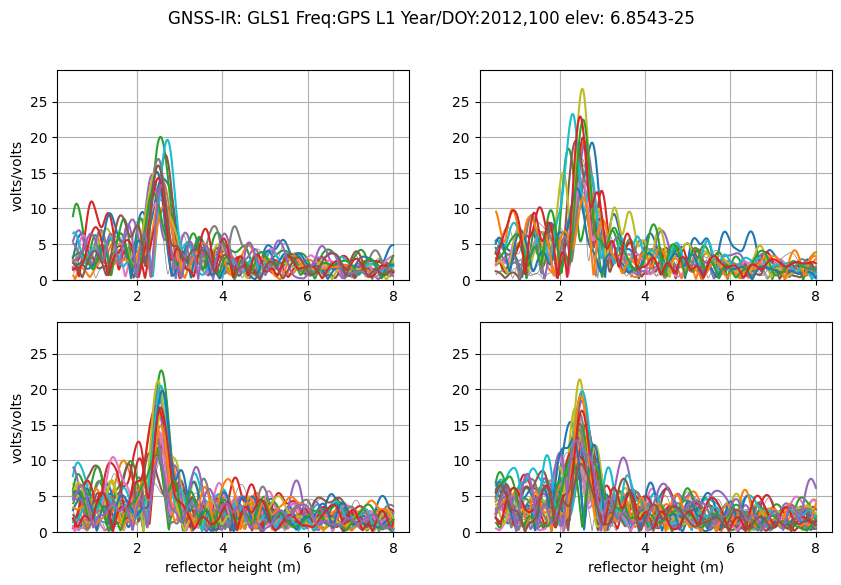

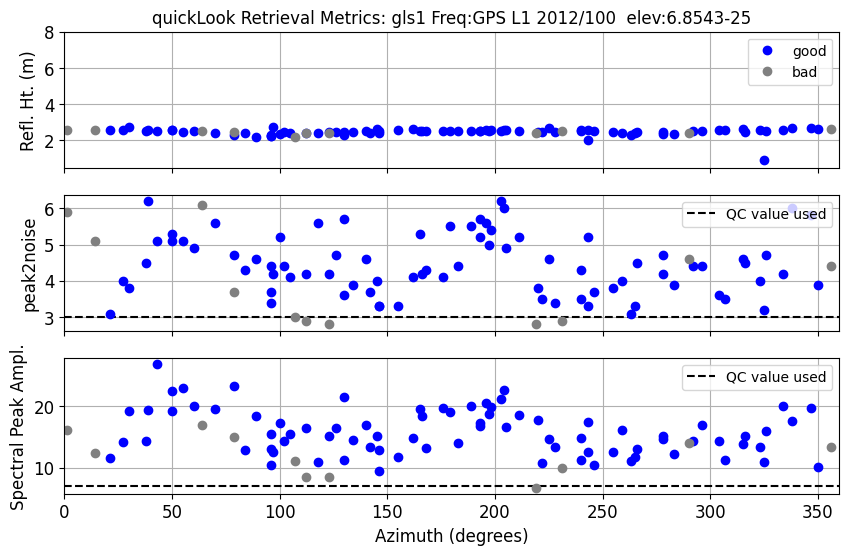

In [21]:
values, metrics = quicklook(station, year, doy=doy, plt=True)

The first plot is a geographically oriented-summary of the frequency content of the GPS data.
The peaks in these periodograms tell us how high the GPS antenna is above the ice surface.
The peaks are associated with a reflector height (RH) of ~2.5 meters. [For more details on quicklook output](https://github.com/kristinemlarson/gnssrefl/blob/master/docs/quickLook_desc.md).

The next plot shows results with respect to azimuth angle.  The top plot is RH and the other 
two are quality control measures: peak amplitude and peak to noise ratio.

In the top plot we see that the retrieved reflector heights are consistent at all azimuths.
Retrievals for azimuths between 340 degrees and 40 degrees are consistently marked as not having
met quality control settings.From the center plot we can see that a peak2noise QC metric of 3 is reasonable. 
Similarly, the amplitudes (bottom plot) are generally larger than 10, so 8 is an acceptable minimum value.

Compare that to its level when the site was installed in the year 2011:

You have invoked the weekly option
gls1  year: 2011  doy: 271 from:  unavco
Requested a GPS only nav file
100% [..............................................................................] 74535 / 74535found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2011/nav/auto2710.11n
https://data.unavco.org/archive/gnss/rinex/obs/2011/271/gls12710.11d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2011/snr/gls1/gls12710.11.snr66
That took  2.22  seconds
Feedback written to subdirectory logs
minimum elevation angle (degrees) for this dataset:  6.9639
It looks like the receiver had an elevation mask. Overriding e1 to this value.
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/quickLook_summary.png


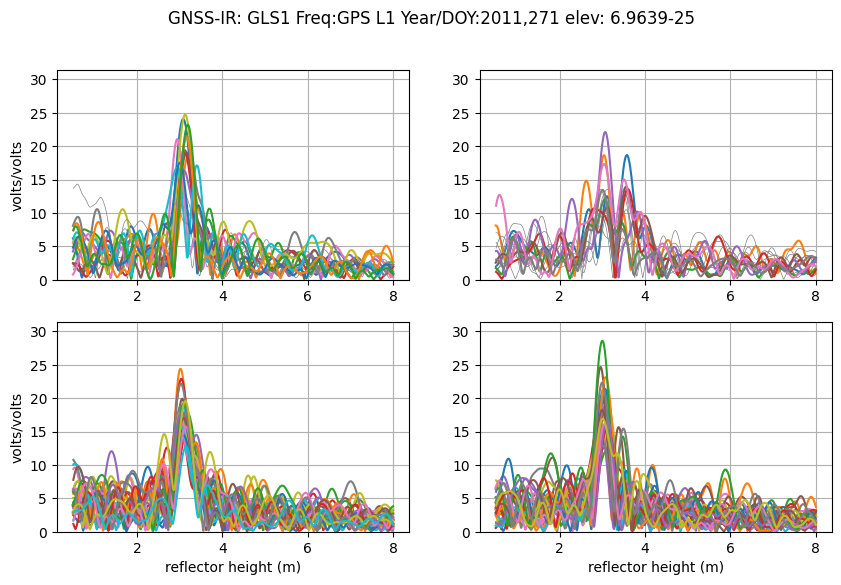

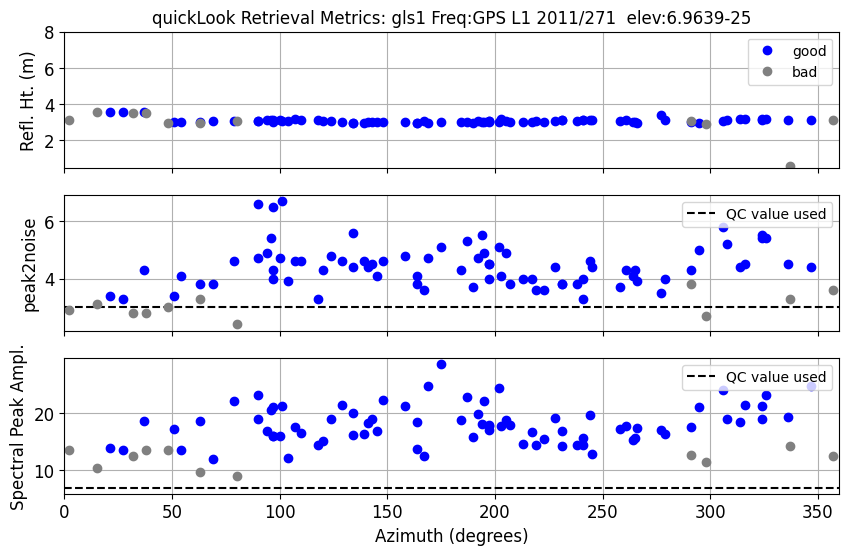

In [22]:
rinex2snr(station, year=2011, doy=271, archive='unavco', weekly=weekly.value)

values, metrics = quicklook(station, 2011, doy=271, plt=True)

## Measure Snow Accumulation in 2012

The first step is to make SNR files for the year 2012:

This should take ~5 minutes

In [24]:
rinex2snr(station, year, 1, doy_end=366, weekly=weekly.value)

You have invoked the weekly option
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10010.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10080.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10150.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10220.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10290.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10360.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10430.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10500.12.snr66
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2012/snr/gls1/gls10570.12

We will next analyze a year of L1 GPS reflection data from this site. We will use the default minimum and maximum 
reflector height values (0.4 and 6 meters). But for the reasons previously stated, we will set a minimum elevation angle 
of 7 degrees. We also specify that we only want to use the L1 data and set peak2noise and a mimimum
amplitude for the periodograms. We will also exclude a bit of the northern tracks by setting our azimuth range to 40-330 degress.
We use the utility **make_gnssir_input** to set and store these analysis settings:

In [25]:
make_gnssir_input(station, e1=7, peak2noise=3, ampl=8, l1=True, azlist2=[40, 330])

Assume you want to use the UNR database.
did not find the UNR database
Try to download the station database from github for you: https://github.com/kristinemlarson/gnssrefl/raw/master/gnssrefl/station_pos.db
If you are not online, it will fail.
If you are able to download the file, it should be stored in the $REFL_CODE/Files directory
100% [............................................................................] 761856 / 761856Using standard frequency choices.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/gls1.json


Note: the removal of these azimuths is more related to the GPS satellite inclination than local conditions at gls1.

Now that you have SNR files and input ready, you can go ahead and estimate reflector heights for the year 2012:

In [26]:
year = 2012
doy = 1
doy_end = 366
plot = False
gnssir(station, year, doy, doy_end=doy_end, plt=plot)

{'station': 'gls1', 'lat': 66.479391272, 'lon': -46.310152753, 'ht': 2148.5783167, 'minH': 0.5, 'maxH': 8.0, 'e1': 7, 'e2': 25.0, 'NReg': [0.5, 8.0], 'PkNoise': 3, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [40, 330], 'freqs': [1], 'reqAmp': [8], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'gls1_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
download and move refraction file
100% [........................................................................] 21773344 / 21773344requested frequencies  [1]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [40, 330]
Using azimuths:  [40, 330]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/gls1_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/
The large re

We will use the **daily_avg** tool to compute a daily average RH. A median filter is set to 0.25 meters 
and 30 individual tracks are required in order to recover a daily average:

All RH retrievals - including bad ones - will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/gls1_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/gls1_allRH.txt 

A total of  54  days were evaluated.
0  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/gls1_AllRH.png
All RH png file without QC saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/gls1_AllRH_noQC.png
Daily average RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/gls1_RH.png
Daily average RH amplitude file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/gls1_RHamp.png
Number of values used in average RH file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/gls1/g

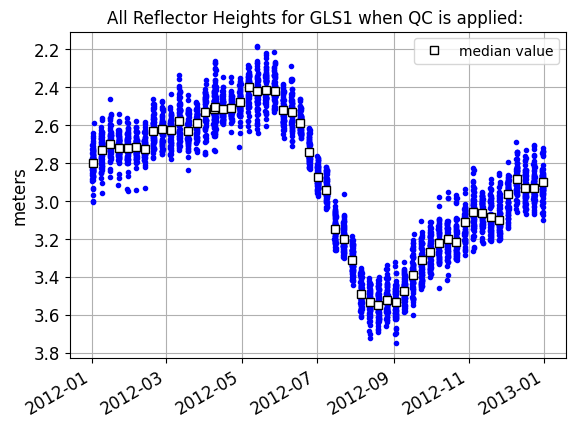

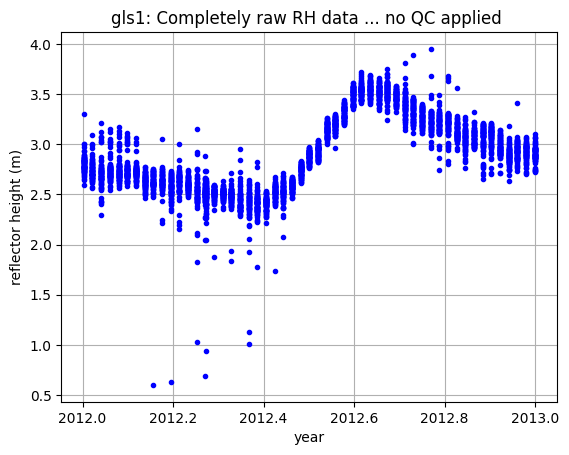

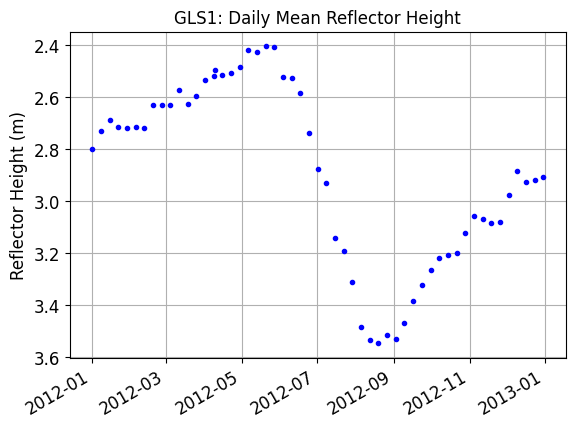

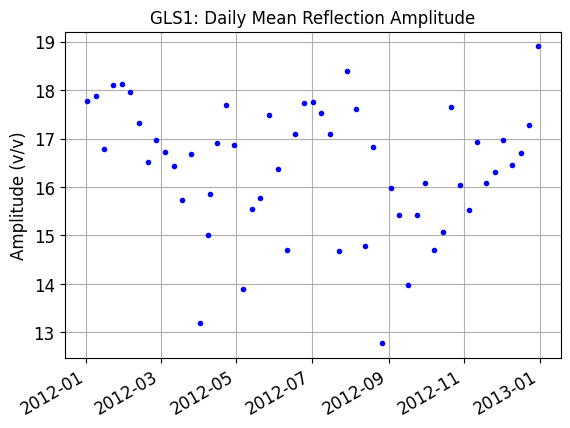

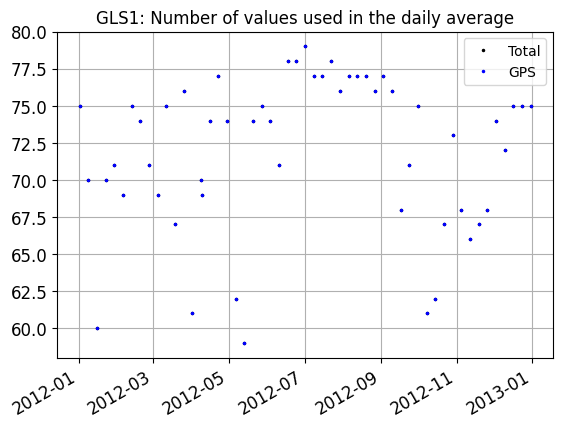

In [27]:
daily_avg(station, medfilter=.25, ReqTracks=30, txtfile='gls1-dailyavg.txt')

Four plots are returned. The first is all tracks. The second shows the number of tracks used in the daily average. The third is the average reflection amplitude. Finally, the average RH each day for the year 2012.

This data shown in the last plot show you long-term accumulation as well as relatively small snow accumulation events. The overall 
plot is dominated by the large melt event in the summer.

**Things to think about:**

* Why do the number of useable tracks drop drastically at various times in the year?

* Why are the number of tracks retrieved in the summer days consistently higher in number than 
in other times of the year? What is different about the surface in the summer of 2012?

* How would you find out whether this year was anomalously large melt?  

* Try comparing the GNSS-IR results with the [validation data](https://tc.copernicus.org/articles/14/1985/2020/tc-14-1985-2020.pdf)

The original [J. Glaciology paper](https://www.kristinelarson.net/wp-content/uploads/2015/10/LarsonWahrKuipers_2015.pdf ) discussing this site.